In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
tf.__version__

'2.0.0'

In [3]:
data = pd.read_csv('Churn_Modelling.csv')

In [4]:
data.shape

(10000, 14)

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
len(data['RowNumber'].unique()), len(data['CustomerId'].unique())

(10000, 10000)

In [7]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [8]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


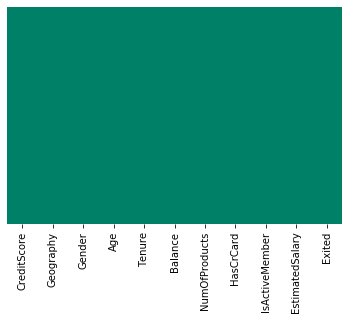

In [9]:
sb.heatmap(data.isna(),
          cbar = False,
          yticklabels = False,
          cmap = 'summer')
plt.show()

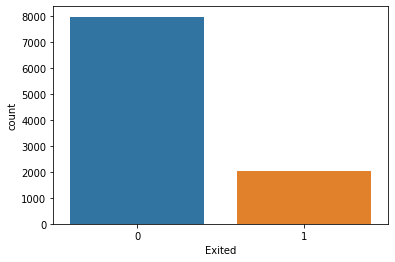

In [10]:
sb.countplot(data['Exited'])
plt.show()

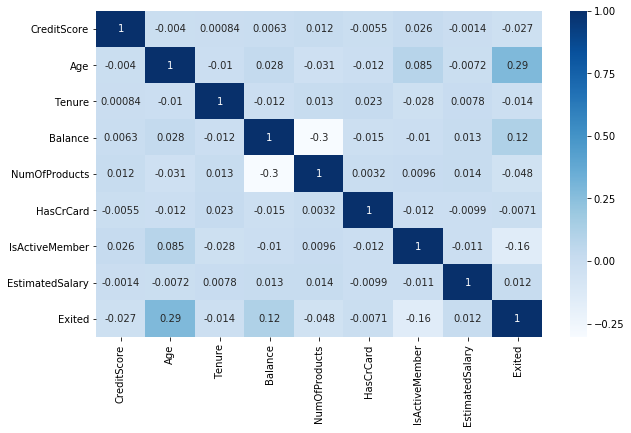

In [11]:
fig, ax = plt.subplots(figsize = (10, 6))

corr = data.corr()
ax = sb.heatmap(corr,
          annot = True,
          cmap = 'Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [12]:
data[data.duplicated()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


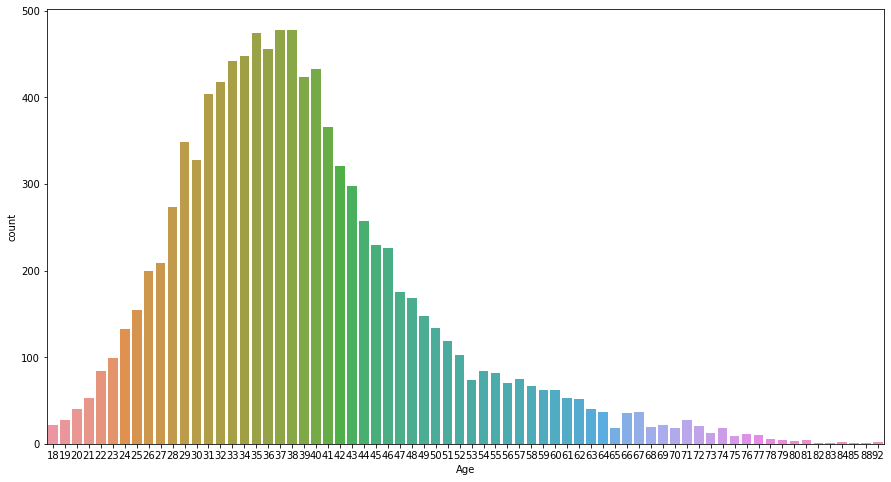

In [13]:
fig, ax = plt.subplots(figsize = (15, 8))

sb.countplot(data['Age'])
plt.show()

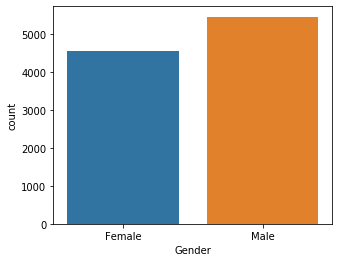

In [14]:
fig, ax = plt.subplots(figsize = (5, 4))

sb.countplot(data['Gender'])
plt.show()

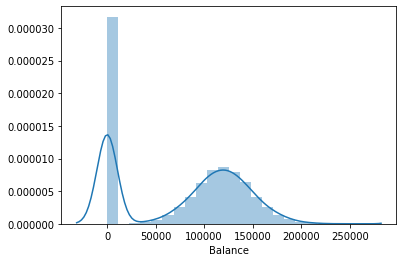

In [15]:
sb.distplot(data['Balance'])
plt.show()

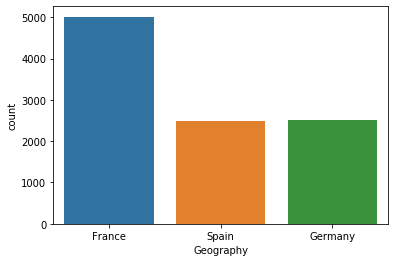

In [16]:
sb.countplot(data['Geography'])
plt.show()

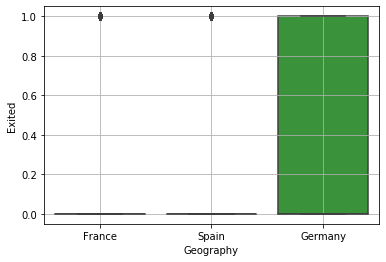

In [17]:
sb.boxplot(x = 'Geography', 
           y = 'Exited', 
           data = data)
plt.grid()
plt.show()

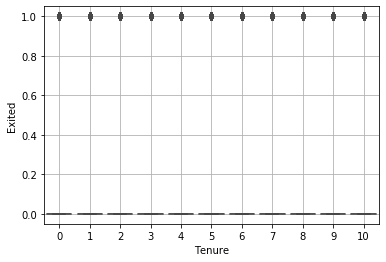

In [18]:
sb.boxplot(x = 'Tenure', 
           y = 'Exited', 
           data = data)
plt.grid()
plt.show()

In [19]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Data Preprocessing

In [20]:
data['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

In [21]:
data['NumOfProducts'].unique()

array([1, 3, 2, 4])

In [22]:
sc = StandardScaler()
data.iloc[:, [0,3,5,9]] = sc.fit_transform(data.iloc[:,[0,3,5,9]])

In [23]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,France,Female,0.293517,2,-1.225848,1,1,1,0.021886,1
1,-0.440036,Spain,Female,0.198164,1,0.117350,1,0,1,0.216534,0
2,-1.536794,France,Female,0.293517,8,1.333053,3,1,0,0.240687,1
3,0.501521,France,Female,0.007457,1,-1.225848,2,0,0,-0.108918,0
4,2.063884,Spain,Female,0.388871,2,0.785728,1,1,1,-0.365276,0


In [24]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1:]

In [25]:
X.shape, Y.shape

((10000, 10), (10000, 1))

In [26]:
X[1]

array([-0.4400359548576657, 'Spain', 'Female', 0.1981638321954454, 1,
       0.11735002143511059, 1, 0, 1, 0.21653375188734025], dtype=object)

In [27]:
lb_geography = LabelEncoder()
lb_gender = LabelEncoder()
X[:, 1] = lb_geography.fit_transform(X[:, 1])
X[:, 2] = lb_gender.fit_transform(X[:, 2])

In [28]:
X[1]

array([-0.4400359548576657, 2, 0, 0.1981638321954454, 1,
       0.11735002143511059, 1, 0, 1, 0.21653375188734025], dtype=object)

In [29]:
ohe = OneHotEncoder(categorical_features = [1])
X = ohe.fit_transform(X).toarray()

In [30]:
X[1]

array([ 0.        ,  0.        ,  1.        , -0.44003595,  0.        ,
        0.19816383,  1.        ,  0.11735002,  1.        ,  0.        ,
        1.        ,  0.21653375])

In [31]:
X = X[:, 1:]

In [32]:
X[1]

array([ 0.        ,  1.        , -0.44003595,  0.        ,  0.19816383,
        1.        ,  0.11735002,  1.        ,  0.        ,  1.        ,
        0.21653375])

In [33]:
X.shape

(10000, 11)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0, stratify = Y)

In [35]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8000, 11), (8000, 1), (2000, 11), (2000, 1))

# Creating Placeholders

To create placeholders we need to disable the eager execution as place holders are not compatible with eager execution

In [36]:
tf.compat.v1.disable_eager_execution()

In [37]:
x = tf.compat.v1.placeholder(dtype = 'float32', shape = [None, 11], name = 'x')
y = tf.compat.v1.placeholder(dtype = 'float32', shape = [None, 1], name = 'y')

In [38]:
x, y

(<tf.Tensor 'x:0' shape=(None, 11) dtype=float32>,
 <tf.Tensor 'y:0' shape=(None, 1) dtype=float32>)

# Initialising weights and bias

In [39]:
sigma = 1
weight_initializer = tf.compat.v1.variance_scaling_initializer(mode = 'fan_avg', distribution = 'uniform', scale = sigma, seed = 42) 
bias_initializer = tf.zeros_initializer()

In [40]:
#Weights and Bias of 1st Layer
w1 = tf.Variable(weight_initializer([x_train.shape[1], 10]))
b1 = tf.Variable(bias_initializer([10]))

#Weights and Bias of 2nd layer
w2 = tf.Variable(weight_initializer([10, 9]))
b2 = tf.Variable(bias_initializer([9]))

#Weights and Bias of 3rd layer
# w3 = tf.Variable(weight_initializer([6, 8]))
# b3 = tf.Variable(bias_initializer([8]))


#Weights and Bias of output layer
wo = tf.Variable(weight_initializer([9, 1]))
bo = tf.Variable(bias_initializer([1]))

init = tf.compat.v1.global_variables_initializer()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [41]:
w1, b1

(<tf.Variable 'Variable:0' shape=(11, 10) dtype=float32>,
 <tf.Variable 'Variable_1:0' shape=(10,) dtype=float32>)

In [42]:
w2, b2

(<tf.Variable 'Variable_2:0' shape=(10, 9) dtype=float32>,
 <tf.Variable 'Variable_3:0' shape=(9,) dtype=float32>)

In [43]:
# w3, b3

In [44]:
wo, bo

(<tf.Variable 'Variable_4:0' shape=(9, 1) dtype=float32>,
 <tf.Variable 'Variable_5:0' shape=(1,) dtype=float32>)

# Forward Propagation

In [45]:
#Layer1 with relu activation function
hidden1 = tf.add(tf.matmul(x, w1), b1)
hidden1 = tf.nn.relu(hidden1)

#layer2 with relu activation function
hidden2 = tf.add(tf.matmul(hidden1, w2), b2)
hidden2 = tf.nn.relu(hidden2)

#layer3
# hidden3 = tf.add(tf.matmul(hidden2, w3), b3)
# hidden3 = tf.nn.relu(hidden3)

#output layer 
out = tf.add(tf.matmul(hidden2, wo), bo, name = 'output')

In [46]:
hidden1, hidden2, out

(<tf.Tensor 'Relu:0' shape=(None, 10) dtype=float32>,
 <tf.Tensor 'Relu_1:0' shape=(None, 9) dtype=float32>,
 <tf.Tensor 'output:0' shape=(None, 1) dtype=float32>)

# Cost Function

cross Entropy:

Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high loss value. A perfect model would have a log loss of 0.

In [47]:
cost_function = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = out, labels = y))

### tf.nn.sigmoid_cross_entropy_with_logits computes the cost for a sigmoid layer.

In [48]:
cost_function

<tf.Tensor 'Mean:0' shape=() dtype=float32>


# Optimizer

In [49]:
learning_rate = 0.0001
opt = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

# launching the graph in Session

In [50]:
sess = tf.compat.v1.Session()
sess.run(init)

In [51]:
sess

# Back Propagation

In [52]:
Training_loss = [ ]
Test_loss = [ ]
pred = [ ]
epochs = 3000
for epoch in range (epochs):
    sess.run(opt, feed_dict = {x: x_train, y: y_train})
    Training_loss.append(sess.run(cost_function, feed_dict = {x: x_train, y: y_train}))
    Test_loss.append(sess.run(cost_function, feed_dict = {x: x_test, y: y_test}))
    
    
    print('Epoch:', epoch, 'Training Cost:', Training_loss[epoch], 'Test Cost:', Test_loss[epoch])

Epoch: 0 Training Cost: 1.6511745 Test Cost: 1.6998616
Epoch: 1 Training Cost: 1.6489062 Test Cost: 1.6975086
Epoch: 2 Training Cost: 1.6466442 Test Cost: 1.6951613
Epoch: 3 Training Cost: 1.6443874 Test Cost: 1.6928213
Epoch: 4 Training Cost: 1.6421362 Test Cost: 1.6904873
Epoch: 5 Training Cost: 1.6398911 Test Cost: 1.6881588
Epoch: 6 Training Cost: 1.6376518 Test Cost: 1.685836
Epoch: 7 Training Cost: 1.6354173 Test Cost: 1.6835164
Epoch: 8 Training Cost: 1.6331885 Test Cost: 1.6812029
Epoch: 9 Training Cost: 1.6309645 Test Cost: 1.6788958
Epoch: 10 Training Cost: 1.6287446 Test Cost: 1.6765924
Epoch: 11 Training Cost: 1.6265304 Test Cost: 1.6742946
Epoch: 12 Training Cost: 1.6243232 Test Cost: 1.6720024
Epoch: 13 Training Cost: 1.6221223 Test Cost: 1.6697183
Epoch: 14 Training Cost: 1.6199291 Test Cost: 1.6674392
Epoch: 15 Training Cost: 1.6177396 Test Cost: 1.665166
Epoch: 16 Training Cost: 1.6155564 Test Cost: 1.6628977
Epoch: 17 Training Cost: 1.6133814 Test Cost: 1.6606365
Epoc

Epoch: 150 Training Cost: 1.378352 Test Cost: 1.4141127
Epoch: 151 Training Cost: 1.3769535 Test Cost: 1.4126424
Epoch: 152 Training Cost: 1.3755593 Test Cost: 1.4111766
Epoch: 153 Training Cost: 1.37417 Test Cost: 1.4097155
Epoch: 154 Training Cost: 1.3727862 Test Cost: 1.4082589
Epoch: 155 Training Cost: 1.3714094 Test Cost: 1.4068079
Epoch: 156 Training Cost: 1.3700358 Test Cost: 1.405362
Epoch: 157 Training Cost: 1.368667 Test Cost: 1.4039214
Epoch: 158 Training Cost: 1.3673021 Test Cost: 1.4024853
Epoch: 159 Training Cost: 1.3659433 Test Cost: 1.4010525
Epoch: 160 Training Cost: 1.3645904 Test Cost: 1.3996251
Epoch: 161 Training Cost: 1.3632405 Test Cost: 1.3982027
Epoch: 162 Training Cost: 1.361895 Test Cost: 1.3967841
Epoch: 163 Training Cost: 1.3605536 Test Cost: 1.3953704
Epoch: 164 Training Cost: 1.3592175 Test Cost: 1.3939631
Epoch: 165 Training Cost: 1.3578856 Test Cost: 1.3925613
Epoch: 166 Training Cost: 1.3565581 Test Cost: 1.3911648
Epoch: 167 Training Cost: 1.3552339 T

Epoch: 302 Training Cost: 1.208169 Test Cost: 1.2359245
Epoch: 303 Training Cost: 1.2072623 Test Cost: 1.2349772
Epoch: 304 Training Cost: 1.2063577 Test Cost: 1.2340332
Epoch: 305 Training Cost: 1.2054558 Test Cost: 1.2330903
Epoch: 306 Training Cost: 1.2045552 Test Cost: 1.2321495
Epoch: 307 Training Cost: 1.2036568 Test Cost: 1.2312111
Epoch: 308 Training Cost: 1.202761 Test Cost: 1.2302744
Epoch: 309 Training Cost: 1.2018677 Test Cost: 1.2293408
Epoch: 310 Training Cost: 1.2009766 Test Cost: 1.2284094
Epoch: 311 Training Cost: 1.200087 Test Cost: 1.2274798
Epoch: 312 Training Cost: 1.1991996 Test Cost: 1.2265521
Epoch: 313 Training Cost: 1.1983144 Test Cost: 1.2256259
Epoch: 314 Training Cost: 1.1974308 Test Cost: 1.2247015
Epoch: 315 Training Cost: 1.1965489 Test Cost: 1.2237793
Epoch: 316 Training Cost: 1.1956693 Test Cost: 1.2228594
Epoch: 317 Training Cost: 1.1947924 Test Cost: 1.2219422
Epoch: 318 Training Cost: 1.1939174 Test Cost: 1.2210265
Epoch: 319 Training Cost: 1.193044

Epoch: 458 Training Cost: 1.0877068 Test Cost: 1.1100616
Epoch: 459 Training Cost: 1.0870467 Test Cost: 1.109374
Epoch: 460 Training Cost: 1.0863873 Test Cost: 1.1086879
Epoch: 461 Training Cost: 1.0857295 Test Cost: 1.1080028
Epoch: 462 Training Cost: 1.0850725 Test Cost: 1.1073191
Epoch: 463 Training Cost: 1.084417 Test Cost: 1.1066365
Epoch: 464 Training Cost: 1.0837622 Test Cost: 1.1059557
Epoch: 465 Training Cost: 1.083109 Test Cost: 1.1052765
Epoch: 466 Training Cost: 1.0824571 Test Cost: 1.1045985
Epoch: 467 Training Cost: 1.0818064 Test Cost: 1.1039217
Epoch: 468 Training Cost: 1.0811568 Test Cost: 1.1032459
Epoch: 469 Training Cost: 1.0805085 Test Cost: 1.1025712
Epoch: 470 Training Cost: 1.0798612 Test Cost: 1.1018975
Epoch: 471 Training Cost: 1.0792152 Test Cost: 1.1012254
Epoch: 472 Training Cost: 1.0785707 Test Cost: 1.1005545
Epoch: 473 Training Cost: 1.0779275 Test Cost: 1.099885
Epoch: 474 Training Cost: 1.0772847 Test Cost: 1.0992168
Epoch: 475 Training Cost: 1.0766437

Epoch: 610 Training Cost: 0.99949783 Test Cost: 1.0180731
Epoch: 611 Training Cost: 0.9989893 Test Cost: 1.0175419
Epoch: 612 Training Cost: 0.9984824 Test Cost: 1.0170114
Epoch: 613 Training Cost: 0.9979762 Test Cost: 1.0164815
Epoch: 614 Training Cost: 0.9974712 Test Cost: 1.0159526
Epoch: 615 Training Cost: 0.9969672 Test Cost: 1.015425
Epoch: 616 Training Cost: 0.9964639 Test Cost: 1.0148978
Epoch: 617 Training Cost: 0.9959614 Test Cost: 1.0143722
Epoch: 618 Training Cost: 0.99545974 Test Cost: 1.0138469
Epoch: 619 Training Cost: 0.9949591 Test Cost: 1.0133226
Epoch: 620 Training Cost: 0.9944591 Test Cost: 1.012799
Epoch: 621 Training Cost: 0.9939601 Test Cost: 1.0122764
Epoch: 622 Training Cost: 0.9934616 Test Cost: 1.0117546
Epoch: 623 Training Cost: 0.99296457 Test Cost: 1.0112336
Epoch: 624 Training Cost: 0.99246794 Test Cost: 1.0107139
Epoch: 625 Training Cost: 0.9919725 Test Cost: 1.0101949
Epoch: 626 Training Cost: 0.9914771 Test Cost: 1.0096769
Epoch: 627 Training Cost: 0.9

Epoch: 762 Training Cost: 0.9311585 Test Cost: 0.94647336
Epoch: 763 Training Cost: 0.9307629 Test Cost: 0.94605815
Epoch: 764 Training Cost: 0.9303675 Test Cost: 0.94564325
Epoch: 765 Training Cost: 0.9299731 Test Cost: 0.9452293
Epoch: 766 Training Cost: 0.92957914 Test Cost: 0.9448157
Epoch: 767 Training Cost: 0.92918575 Test Cost: 0.9444028
Epoch: 768 Training Cost: 0.928793 Test Cost: 0.94399047
Epoch: 769 Training Cost: 0.92840093 Test Cost: 0.9435792
Epoch: 770 Training Cost: 0.9280088 Test Cost: 0.9431693
Epoch: 771 Training Cost: 0.927618 Test Cost: 0.9427597
Epoch: 772 Training Cost: 0.92722726 Test Cost: 0.9423511
Epoch: 773 Training Cost: 0.92683715 Test Cost: 0.9419425
Epoch: 774 Training Cost: 0.9264481 Test Cost: 0.9415349
Epoch: 775 Training Cost: 0.9260591 Test Cost: 0.9411276
Epoch: 776 Training Cost: 0.92567104 Test Cost: 0.94072133
Epoch: 777 Training Cost: 0.92528284 Test Cost: 0.94031525
Epoch: 778 Training Cost: 0.9248954 Test Cost: 0.9399095
Epoch: 779 Training 

Epoch: 912 Training Cost: 0.8780453 Test Cost: 0.89089054
Epoch: 913 Training Cost: 0.8777299 Test Cost: 0.89056087
Epoch: 914 Training Cost: 0.87741464 Test Cost: 0.8902317
Epoch: 915 Training Cost: 0.8770995 Test Cost: 0.88990235
Epoch: 916 Training Cost: 0.8767853 Test Cost: 0.8895741
Epoch: 917 Training Cost: 0.8764708 Test Cost: 0.8892458
Epoch: 918 Training Cost: 0.8761575 Test Cost: 0.88891816
Epoch: 919 Training Cost: 0.8758445 Test Cost: 0.88859093
Epoch: 920 Training Cost: 0.87553215 Test Cost: 0.8882646
Epoch: 921 Training Cost: 0.87522084 Test Cost: 0.8879384
Epoch: 922 Training Cost: 0.87490946 Test Cost: 0.8876127
Epoch: 923 Training Cost: 0.8745986 Test Cost: 0.88728726
Epoch: 924 Training Cost: 0.87428856 Test Cost: 0.88696283
Epoch: 925 Training Cost: 0.87397873 Test Cost: 0.886639
Epoch: 926 Training Cost: 0.87366945 Test Cost: 0.8863154
Epoch: 927 Training Cost: 0.8733608 Test Cost: 0.8859925
Epoch: 928 Training Cost: 0.8730526 Test Cost: 0.8856696
Epoch: 929 Trainin

Epoch: 1062 Training Cost: 0.8355441 Test Cost: 0.8463453
Epoch: 1063 Training Cost: 0.83529 Test Cost: 0.84607863
Epoch: 1064 Training Cost: 0.83503634 Test Cost: 0.8458123
Epoch: 1065 Training Cost: 0.83478326 Test Cost: 0.8455465
Epoch: 1066 Training Cost: 0.8345303 Test Cost: 0.845281
Epoch: 1067 Training Cost: 0.83427787 Test Cost: 0.8450159
Epoch: 1068 Training Cost: 0.8340257 Test Cost: 0.8447512
Epoch: 1069 Training Cost: 0.8337738 Test Cost: 0.8444872
Epoch: 1070 Training Cost: 0.8335223 Test Cost: 0.8442234
Epoch: 1071 Training Cost: 0.8332711 Test Cost: 0.84395975
Epoch: 1072 Training Cost: 0.8330199 Test Cost: 0.8436971
Epoch: 1073 Training Cost: 0.8327699 Test Cost: 0.843435
Epoch: 1074 Training Cost: 0.83252 Test Cost: 0.84317285
Epoch: 1075 Training Cost: 0.8322701 Test Cost: 0.84291124
Epoch: 1076 Training Cost: 0.8320211 Test Cost: 0.8426504
Epoch: 1077 Training Cost: 0.8317722 Test Cost: 0.84238976
Epoch: 1078 Training Cost: 0.83152354 Test Cost: 0.8421293
Epoch: 1079

Epoch: 1209 Training Cost: 0.80179954 Test Cost: 0.81105053
Epoch: 1210 Training Cost: 0.80159235 Test Cost: 0.81083363
Epoch: 1211 Training Cost: 0.8013853 Test Cost: 0.8106172
Epoch: 1212 Training Cost: 0.80117875 Test Cost: 0.8104015
Epoch: 1213 Training Cost: 0.80097204 Test Cost: 0.810186
Epoch: 1214 Training Cost: 0.8007661 Test Cost: 0.8099708
Epoch: 1215 Training Cost: 0.8005602 Test Cost: 0.80975646
Epoch: 1216 Training Cost: 0.80035454 Test Cost: 0.8095415
Epoch: 1217 Training Cost: 0.8001498 Test Cost: 0.80932736
Epoch: 1218 Training Cost: 0.7999446 Test Cost: 0.8091133
Epoch: 1219 Training Cost: 0.7997396 Test Cost: 0.80889964
Epoch: 1220 Training Cost: 0.79953533 Test Cost: 0.8086859
Epoch: 1221 Training Cost: 0.79933095 Test Cost: 0.8084724
Epoch: 1222 Training Cost: 0.799127 Test Cost: 0.80825925
Epoch: 1223 Training Cost: 0.7989232 Test Cost: 0.8080462
Epoch: 1224 Training Cost: 0.79872 Test Cost: 0.8078335
Epoch: 1225 Training Cost: 0.79851663 Test Cost: 0.8076211
Epoc

Epoch: 1384 Training Cost: 0.76923025 Test Cost: 0.7770647
Epoch: 1385 Training Cost: 0.7690636 Test Cost: 0.77689034
Epoch: 1386 Training Cost: 0.7688971 Test Cost: 0.7767163
Epoch: 1387 Training Cost: 0.7687308 Test Cost: 0.7765425
Epoch: 1388 Training Cost: 0.7685648 Test Cost: 0.7763688
Epoch: 1389 Training Cost: 0.7683988 Test Cost: 0.77619505
Epoch: 1390 Training Cost: 0.7682334 Test Cost: 0.7760223
Epoch: 1391 Training Cost: 0.7680681 Test Cost: 0.7758492
Epoch: 1392 Training Cost: 0.76790273 Test Cost: 0.7756768
Epoch: 1393 Training Cost: 0.7677379 Test Cost: 0.775504
Epoch: 1394 Training Cost: 0.7675728 Test Cost: 0.7753318
Epoch: 1395 Training Cost: 0.76740813 Test Cost: 0.7751595
Epoch: 1396 Training Cost: 0.7672439 Test Cost: 0.77498746
Epoch: 1397 Training Cost: 0.7670797 Test Cost: 0.77481556
Epoch: 1398 Training Cost: 0.7669155 Test Cost: 0.7746439
Epoch: 1399 Training Cost: 0.76675177 Test Cost: 0.77447265
Epoch: 1400 Training Cost: 0.76658815 Test Cost: 0.7743015
Epoch

Epoch: 1542 Training Cost: 0.7451096 Test Cost: 0.7518415
Epoch: 1543 Training Cost: 0.7449697 Test Cost: 0.7516951
Epoch: 1544 Training Cost: 0.74482983 Test Cost: 0.75154835
Epoch: 1545 Training Cost: 0.74469 Test Cost: 0.7514021
Epoch: 1546 Training Cost: 0.74455035 Test Cost: 0.7512558
Epoch: 1547 Training Cost: 0.7444111 Test Cost: 0.7511097
Epoch: 1548 Training Cost: 0.74427193 Test Cost: 0.75096387
Epoch: 1549 Training Cost: 0.7441326 Test Cost: 0.750818
Epoch: 1550 Training Cost: 0.7439934 Test Cost: 0.7506722
Epoch: 1551 Training Cost: 0.7438546 Test Cost: 0.7505267
Epoch: 1552 Training Cost: 0.74371594 Test Cost: 0.75038135
Epoch: 1553 Training Cost: 0.7435778 Test Cost: 0.7502362
Epoch: 1554 Training Cost: 0.7434391 Test Cost: 0.75009143
Epoch: 1555 Training Cost: 0.7433015 Test Cost: 0.74994606
Epoch: 1556 Training Cost: 0.74316275 Test Cost: 0.7498013
Epoch: 1557 Training Cost: 0.7430249 Test Cost: 0.7496567
Epoch: 1558 Training Cost: 0.74288696 Test Cost: 0.7495122
Epoch:

Epoch: 1703 Training Cost: 0.7242746 Test Cost: 0.73007506
Epoch: 1704 Training Cost: 0.7241546 Test Cost: 0.7299504
Epoch: 1705 Training Cost: 0.72403526 Test Cost: 0.7298258
Epoch: 1706 Training Cost: 0.72391564 Test Cost: 0.72970164
Epoch: 1707 Training Cost: 0.72379607 Test Cost: 0.7295764
Epoch: 1708 Training Cost: 0.7236766 Test Cost: 0.7294522
Epoch: 1709 Training Cost: 0.7235572 Test Cost: 0.72932786
Epoch: 1710 Training Cost: 0.7234385 Test Cost: 0.72920346
Epoch: 1711 Training Cost: 0.7233191 Test Cost: 0.72907937
Epoch: 1712 Training Cost: 0.72319996 Test Cost: 0.7289553
Epoch: 1713 Training Cost: 0.7230812 Test Cost: 0.7288313
Epoch: 1714 Training Cost: 0.7229628 Test Cost: 0.7287075
Epoch: 1715 Training Cost: 0.72284406 Test Cost: 0.7285835
Epoch: 1716 Training Cost: 0.7227251 Test Cost: 0.72845984
Epoch: 1717 Training Cost: 0.72260654 Test Cost: 0.72833645
Epoch: 1718 Training Cost: 0.7224885 Test Cost: 0.7282129
Epoch: 1719 Training Cost: 0.7223701 Test Cost: 0.7280896
E

Epoch: 1848 Training Cost: 0.7079442 Test Cost: 0.7131783
Epoch: 1849 Training Cost: 0.7078384 Test Cost: 0.7130693
Epoch: 1850 Training Cost: 0.7077327 Test Cost: 0.7129607
Epoch: 1851 Training Cost: 0.7076274 Test Cost: 0.7128522
Epoch: 1852 Training Cost: 0.70752215 Test Cost: 0.7127439
Epoch: 1853 Training Cost: 0.70741665 Test Cost: 0.7126359
Epoch: 1854 Training Cost: 0.7073118 Test Cost: 0.71252745
Epoch: 1855 Training Cost: 0.70720685 Test Cost: 0.712419
Epoch: 1856 Training Cost: 0.7071018 Test Cost: 0.71231115
Epoch: 1857 Training Cost: 0.70699733 Test Cost: 0.71220326
Epoch: 1858 Training Cost: 0.7068927 Test Cost: 0.7120958
Epoch: 1859 Training Cost: 0.7067883 Test Cost: 0.7119883
Epoch: 1860 Training Cost: 0.70668364 Test Cost: 0.71188027
Epoch: 1861 Training Cost: 0.70657945 Test Cost: 0.71177304
Epoch: 1862 Training Cost: 0.70647484 Test Cost: 0.71166533
Epoch: 1863 Training Cost: 0.70637065 Test Cost: 0.71155816
Epoch: 1864 Training Cost: 0.7062669 Test Cost: 0.7114509


Epoch: 2003 Training Cost: 0.6925513 Test Cost: 0.6973489
Epoch: 2004 Training Cost: 0.6924576 Test Cost: 0.69725263
Epoch: 2005 Training Cost: 0.69236416 Test Cost: 0.69715685
Epoch: 2006 Training Cost: 0.6922701 Test Cost: 0.6970604
Epoch: 2007 Training Cost: 0.6921767 Test Cost: 0.69696474
Epoch: 2008 Training Cost: 0.69208336 Test Cost: 0.6968689
Epoch: 2009 Training Cost: 0.69199 Test Cost: 0.6967732
Epoch: 2010 Training Cost: 0.6918966 Test Cost: 0.69667727
Epoch: 2011 Training Cost: 0.69180334 Test Cost: 0.69658184
Epoch: 2012 Training Cost: 0.69171023 Test Cost: 0.69648635
Epoch: 2013 Training Cost: 0.69161713 Test Cost: 0.69639075
Epoch: 2014 Training Cost: 0.69152427 Test Cost: 0.6962957
Epoch: 2015 Training Cost: 0.69143116 Test Cost: 0.69619995
Epoch: 2016 Training Cost: 0.69133866 Test Cost: 0.6961046
Epoch: 2017 Training Cost: 0.6912457 Test Cost: 0.6960097
Epoch: 2018 Training Cost: 0.6911528 Test Cost: 0.69591445
Epoch: 2019 Training Cost: 0.69106007 Test Cost: 0.695819

Epoch: 2164 Training Cost: 0.67827463 Test Cost: 0.68267494
Epoch: 2165 Training Cost: 0.678191 Test Cost: 0.68258876
Epoch: 2166 Training Cost: 0.67810744 Test Cost: 0.6825024
Epoch: 2167 Training Cost: 0.6780237 Test Cost: 0.6824165
Epoch: 2168 Training Cost: 0.67794037 Test Cost: 0.68233037
Epoch: 2169 Training Cost: 0.6778567 Test Cost: 0.6822447
Epoch: 2170 Training Cost: 0.6777733 Test Cost: 0.6821586
Epoch: 2171 Training Cost: 0.6776903 Test Cost: 0.6820729
Epoch: 2172 Training Cost: 0.67760694 Test Cost: 0.68198717
Epoch: 2173 Training Cost: 0.6775238 Test Cost: 0.6819017
Epoch: 2174 Training Cost: 0.67744046 Test Cost: 0.6818161
Epoch: 2175 Training Cost: 0.6773572 Test Cost: 0.6817304
Epoch: 2176 Training Cost: 0.6772743 Test Cost: 0.6816449
Epoch: 2177 Training Cost: 0.67719126 Test Cost: 0.6815593
Epoch: 2178 Training Cost: 0.6771084 Test Cost: 0.68147415
Epoch: 2179 Training Cost: 0.6770256 Test Cost: 0.68138915
Epoch: 2180 Training Cost: 0.6769428 Test Cost: 0.6813038
Epo

Epoch: 2320 Training Cost: 0.66586536 Test Cost: 0.66991234
Epoch: 2321 Training Cost: 0.6657897 Test Cost: 0.6698346
Epoch: 2322 Training Cost: 0.6657145 Test Cost: 0.6697568
Epoch: 2323 Training Cost: 0.66563874 Test Cost: 0.6696791
Epoch: 2324 Training Cost: 0.6655634 Test Cost: 0.6696013
Epoch: 2325 Training Cost: 0.6654882 Test Cost: 0.6695238
Epoch: 2326 Training Cost: 0.66541296 Test Cost: 0.6694462
Epoch: 2327 Training Cost: 0.6653374 Test Cost: 0.66936857
Epoch: 2328 Training Cost: 0.66526204 Test Cost: 0.66929114
Epoch: 2329 Training Cost: 0.66518694 Test Cost: 0.66921365
Epoch: 2330 Training Cost: 0.6651115 Test Cost: 0.66913664
Epoch: 2331 Training Cost: 0.6650364 Test Cost: 0.66905886
Epoch: 2332 Training Cost: 0.6649616 Test Cost: 0.66898155
Epoch: 2333 Training Cost: 0.6648863 Test Cost: 0.6689043
Epoch: 2334 Training Cost: 0.66481113 Test Cost: 0.6688272
Epoch: 2335 Training Cost: 0.66473645 Test Cost: 0.6687497
Epoch: 2336 Training Cost: 0.66466135 Test Cost: 0.668673


Epoch: 2482 Training Cost: 0.654178 Test Cost: 0.6579202
Epoch: 2483 Training Cost: 0.6541091 Test Cost: 0.6578498
Epoch: 2484 Training Cost: 0.65404063 Test Cost: 0.6577793
Epoch: 2485 Training Cost: 0.65397173 Test Cost: 0.6577091
Epoch: 2486 Training Cost: 0.653903 Test Cost: 0.6576388
Epoch: 2487 Training Cost: 0.65383446 Test Cost: 0.65756845
Epoch: 2488 Training Cost: 0.65376586 Test Cost: 0.6574983
Epoch: 2489 Training Cost: 0.65369695 Test Cost: 0.6574281
Epoch: 2490 Training Cost: 0.6536285 Test Cost: 0.65735805
Epoch: 2491 Training Cost: 0.65356004 Test Cost: 0.6572881
Epoch: 2492 Training Cost: 0.65349144 Test Cost: 0.65721804
Epoch: 2493 Training Cost: 0.6534232 Test Cost: 0.6571478
Epoch: 2494 Training Cost: 0.6533547 Test Cost: 0.6570781
Epoch: 2495 Training Cost: 0.6532865 Test Cost: 0.6570082
Epoch: 2496 Training Cost: 0.65321815 Test Cost: 0.65693843
Epoch: 2497 Training Cost: 0.65314955 Test Cost: 0.6568684
Epoch: 2498 Training Cost: 0.65308166 Test Cost: 0.65679884
E

Epoch: 2653 Training Cost: 0.64294124 Test Cost: 0.64643955
Epoch: 2654 Training Cost: 0.64287865 Test Cost: 0.64637536
Epoch: 2655 Training Cost: 0.64281595 Test Cost: 0.6463118
Epoch: 2656 Training Cost: 0.64275354 Test Cost: 0.64624774
Epoch: 2657 Training Cost: 0.6426909 Test Cost: 0.6461841
Epoch: 2658 Training Cost: 0.64262855 Test Cost: 0.6461203
Epoch: 2659 Training Cost: 0.64256614 Test Cost: 0.6460564
Epoch: 2660 Training Cost: 0.64250356 Test Cost: 0.6459926
Epoch: 2661 Training Cost: 0.64244103 Test Cost: 0.64592874
Epoch: 2662 Training Cost: 0.64237857 Test Cost: 0.6458651
Epoch: 2663 Training Cost: 0.6423163 Test Cost: 0.6458013
Epoch: 2664 Training Cost: 0.64225394 Test Cost: 0.6457376
Epoch: 2665 Training Cost: 0.64219165 Test Cost: 0.6456741
Epoch: 2666 Training Cost: 0.64212954 Test Cost: 0.6456106
Epoch: 2667 Training Cost: 0.64206713 Test Cost: 0.645547
Epoch: 2668 Training Cost: 0.64200497 Test Cost: 0.6454832
Epoch: 2669 Training Cost: 0.6419429 Test Cost: 0.64541

Epoch: 2800 Training Cost: 0.6340806 Test Cost: 0.6373746
Epoch: 2801 Training Cost: 0.6340226 Test Cost: 0.6373152
Epoch: 2802 Training Cost: 0.6339646 Test Cost: 0.6372557
Epoch: 2803 Training Cost: 0.6339066 Test Cost: 0.6371964
Epoch: 2804 Training Cost: 0.6338488 Test Cost: 0.63713723
Epoch: 2805 Training Cost: 0.63379097 Test Cost: 0.6370778
Epoch: 2806 Training Cost: 0.63373286 Test Cost: 0.6370187
Epoch: 2807 Training Cost: 0.63367516 Test Cost: 0.6369595
Epoch: 2808 Training Cost: 0.63361734 Test Cost: 0.6369002
Epoch: 2809 Training Cost: 0.6335592 Test Cost: 0.63684106
Epoch: 2810 Training Cost: 0.63350147 Test Cost: 0.6367822
Epoch: 2811 Training Cost: 0.63344365 Test Cost: 0.636723
Epoch: 2812 Training Cost: 0.63338584 Test Cost: 0.63666403
Epoch: 2813 Training Cost: 0.63332844 Test Cost: 0.6366048
Epoch: 2814 Training Cost: 0.6332705 Test Cost: 0.6365459
Epoch: 2815 Training Cost: 0.6332129 Test Cost: 0.6364867
Epoch: 2816 Training Cost: 0.63315505 Test Cost: 0.6364278
Epo

Epoch: 2953 Training Cost: 0.62553 Test Cost: 0.6286109
Epoch: 2954 Training Cost: 0.6254764 Test Cost: 0.62855554
Epoch: 2955 Training Cost: 0.6254228 Test Cost: 0.62850034
Epoch: 2956 Training Cost: 0.6253689 Test Cost: 0.6284451
Epoch: 2957 Training Cost: 0.62531507 Test Cost: 0.62839
Epoch: 2958 Training Cost: 0.62526137 Test Cost: 0.6283348
Epoch: 2959 Training Cost: 0.62520796 Test Cost: 0.62827986
Epoch: 2960 Training Cost: 0.625154 Test Cost: 0.62822473
Epoch: 2961 Training Cost: 0.62510073 Test Cost: 0.6281699
Epoch: 2962 Training Cost: 0.62504685 Test Cost: 0.6281148
Epoch: 2963 Training Cost: 0.62499326 Test Cost: 0.6280598
Epoch: 2964 Training Cost: 0.6249398 Test Cost: 0.6280046
Epoch: 2965 Training Cost: 0.62488645 Test Cost: 0.62794983
Epoch: 2966 Training Cost: 0.6248329 Test Cost: 0.62789476
Epoch: 2967 Training Cost: 0.62477964 Test Cost: 0.6278401
Epoch: 2968 Training Cost: 0.62472606 Test Cost: 0.627785
Epoch: 2969 Training Cost: 0.62467253 Test Cost: 0.6277306
Epoc

## Using the Sigmoid Activation Function to get the probabilities 

In [53]:
output = tf.nn.sigmoid(out)

In [54]:
y_pred = sess.run(output, feed_dict = {x: x_test})

In [55]:
y_pred

array([[0.377226  ],
       [0.4332735 ],
       [0.6302072 ],
       ...,
       [0.41392887],
       [0.40161118],
       [0.42392445]], dtype=float32)

In [56]:
y_pred = (y_pred > 0.5)

In [57]:
y_pred

array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [58]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1377,  216],
       [ 288,  119]])

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1593
           1       0.36      0.29      0.32       407

    accuracy                           0.75      2000
   macro avg       0.59      0.58      0.58      2000
weighted avg       0.73      0.75      0.74      2000



In [60]:
print(accuracy_score(y_test, y_pred))

0.748


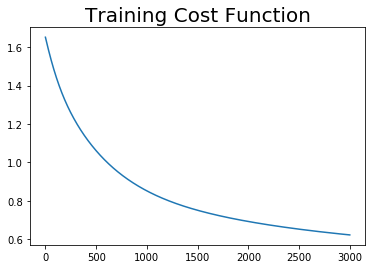

In [61]:
plt.plot(Training_loss)
plt.title('Training Cost Function', fontsize = 20)
plt.show()

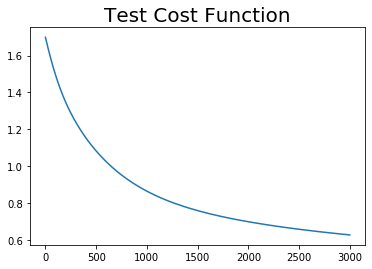

In [62]:
plt.plot(Test_loss)
plt.title('Test Cost Function', fontsize = 20)
plt.show()

# Saving the Model

In [63]:
saver = tf.compat.v1.train.Saver()
saver.save(sess,'classification_models/Bank.ckpt')

'classification_models/Bank.ckpt'

# Loading the model

In [64]:
with tf.compat.v1.Session() as ses:
    saver = tf.compat.v1.train.import_meta_graph('/home/admin1/Tensorflow/classification_models/Bank.ckpt.meta')
    model = saver.restore(ses, tf.train.latest_checkpoint('/home/admin1/Tensorflow/classification_models/'))
    
    graph = tf.compat.v1.get_default_graph()
    input_x = graph.get_tensor_by_name("x:0")
    input_y = graph.get_tensor_by_name("y:0")
    
    output = graph.get_tensor_by_name("output:0")
    
    
    feed_dict = {input_x: x_test}
    predictions = output.eval(feed_dict = feed_dict)
    result = tf.nn.sigmoid(predictions)
    y_pred = ses.run(result, feed_dict = {x: x_test})

INFO:tensorflow:Restoring parameters from /home/admin1/Tensorflow/classification_models/Bank.ckpt


In [65]:
y_pred

array([[0.377226  ],
       [0.4332735 ],
       [0.6302072 ],
       ...,
       [0.41392887],
       [0.40161118],
       [0.42392445]], dtype=float32)

# Predicting for one input value

In [66]:
a = X[500]

In [67]:
a

array([ 0.        ,  1.        , -0.98841507,  1.        , -0.66001848,
        4.        , -1.22584767,  2.        ,  1.        ,  1.        ,
       -0.79440693])

In [68]:
a.shape

(11,)

In [69]:
a = np.reshape(a, (1, 11))

In [70]:
a.shape

(1, 11)

In [71]:
with tf.compat.v1.Session() as ses:
    saver = tf.compat.v1.train.import_meta_graph('/home/admin1/Tensorflow/classification_models/Bank.ckpt.meta')
    model = saver.restore(ses, tf.train.latest_checkpoint('/home/admin1/Tensorflow/classification_models/'))
    
    graph = tf.compat.v1.get_default_graph()
    input_x = graph.get_tensor_by_name("x:0")
    input_y = graph.get_tensor_by_name("y:0")
    
    output = graph.get_tensor_by_name("output:0")
    
    
    feed_dict = {input_x: a}
    prediction = output.eval(feed_dict = feed_dict)
    result = tf.nn.sigmoid(prediction)
    pred = ses.run(result, feed_dict = {x: a})

INFO:tensorflow:Restoring parameters from /home/admin1/Tensorflow/classification_models/Bank.ckpt


In [72]:
pred

array([[0.40722838]], dtype=float32)

In [73]:
if pred > 0.5:
    print('Exited')
else:
    print('Not Exited')

Not Exited


In [74]:
import pickle

In [75]:
model = {'LBGeography': lb_geography, 'LBGender':lb_gender, 'OHE': ohe, 'SC': sc}

In [76]:
model

{'LBGeography': LabelEncoder(),
 'LBGender': LabelEncoder(),
 'OHE': OneHotEncoder(categorical_features=[1], categories=None, drop=None,
               dtype=<class 'numpy.float64'>, handle_unknown='error',
               n_values=None, sparse=True),
 'SC': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [77]:
pickle.dump(model, open('model.pkl','wb'))